<h1>Feature Selection</h1>

<h4>1.) Variance Threshold</h4>

In [16]:
import pandas as pd
import numpy as np

In [3]:
data = pd.DataFrame({'A': [1,2,4,1,2,4],
                     'B': [4,5,6,7,8,9],
                     'C': [0,0,0,0,0,0],
                     'D': [1,1,1,1,1,1]
                    })

In [4]:
data

,A,B,C,D
0,1,4,0,1
1,2,5,0,1
2,4,6,0,1
3,1,7,0,1
4,2,8,0,1
5,4,9,0,1


In [6]:
from sklearn.feature_selection import VarianceThreshold
vt = VarianceThreshold(threshold=0) # Remove features where variance is zero   
vt.fit(data)

VarianceThreshold(threshold=0)

In [8]:
vt.get_support()

array([ True,  True, False, False])

In [32]:
constant_columns = [col for col in data.columns if col not in data.columns[vt.get_support()]]

In [33]:
constant_columns

['C', 'D']

In [27]:
i=0
for col in data.columns:
    if not vt.get_support()[i]:
        print(col)
    i+=1

C
D


In [29]:
data.columns[vt.get_support()]

Index(['A', 'B'], dtype='object')

Kaggle Example

In [36]:
df = pd.read_csv('train.csv', nrows=10000)

In [37]:
df.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [39]:
X = df.drop('TARGET', axis=1)
y = df.TARGET

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(labels=['TARGET'], axis=1),
    df['TARGET'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((7000, 370), (3000, 370))

In [42]:
vt = VarianceThreshold(threshold=0)
vt.fit(X_train) 

VarianceThreshold(threshold=0)

In [43]:
sum(vt.get_support())

284

In [44]:
vt.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False, False,  True,  True,  True,  True,  True, False,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False, False, False, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False, False,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True, False, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False, False,  True,  True,  True,
        True,  True, False, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [47]:
constant_columns = [col for col in X_train.columns if col not in X_train.columns[vt.get_support()]] 

In [48]:
constant_columns

['ind_var2_0',
 'ind_var2',
 'ind_var13_medio_0',
 'ind_var13_medio',
 'ind_var18_0',
 'ind_var18',
 'ind_var27_0',
 'ind_var28_0',
 'ind_var28',
 'ind_var27',
 'ind_var34_0',
 'ind_var34',
 'ind_var41',
 'ind_var46_0',
 'ind_var46',
 'num_var13_medio_0',
 'num_var13_medio',
 'num_var18_0',
 'num_var18',
 'num_var27_0',
 'num_var28_0',
 'num_var28',
 'num_var27',
 'num_var34_0',
 'num_var34',
 'num_var41',
 'num_var46_0',
 'num_var46',
 'saldo_var13_medio',
 'saldo_var18',
 'saldo_var28',
 'saldo_var27',
 'saldo_var34',
 'saldo_var41',
 'saldo_var46',
 'delta_imp_amort_var18_1y3',
 'delta_imp_amort_var34_1y3',
 'delta_imp_reemb_var17_1y3',
 'delta_imp_reemb_var33_1y3',
 'delta_imp_trasp_var17_out_1y3',
 'delta_imp_trasp_var33_out_1y3',
 'delta_num_reemb_var17_1y3',
 'delta_num_reemb_var33_1y3',
 'delta_num_trasp_var17_out_1y3',
 'delta_num_trasp_var33_out_1y3',
 'imp_amort_var18_hace3',
 'imp_amort_var18_ult1',
 'imp_amort_var34_hace3',
 'imp_amort_var34_ult1',
 'imp_var7_emit_ult1',
 

In [51]:
X_train.drop(constant_columns,axis=1,inplace=True)

In [52]:
X_train.shape

(7000, 284)

<h4>2.) Pearson Correlation</h4>

In [54]:
from sklearn.datasets import load_boston
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [86]:
data = load_boston()
df = pd.DataFrame(data.data, columns = data.feature_names)
df["MEDV"] = data.target

In [87]:
data.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [88]:
X = df.drop("MEDV",axis=1)
y = df["MEDV"]

In [89]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((354, 13), (152, 13))

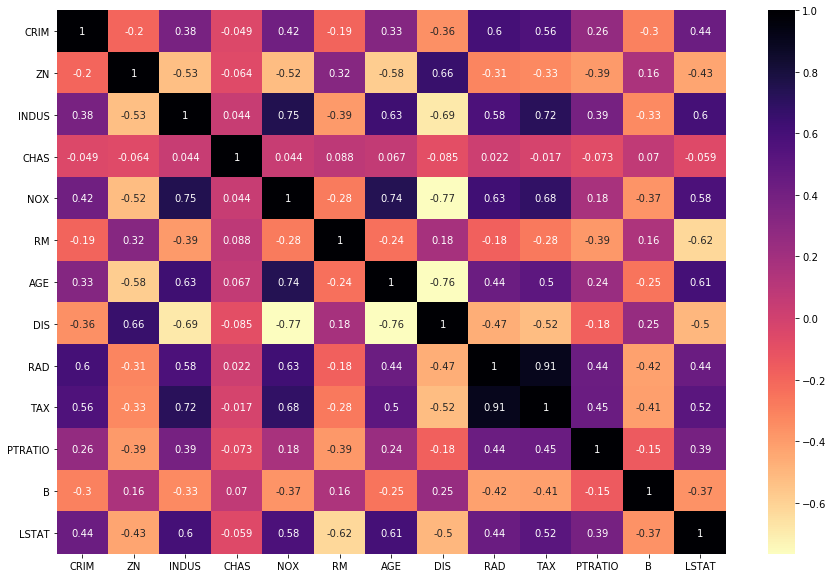

In [90]:
import seaborn as sns
plt.figure(figsize=(15,10))
sns.heatmap(X_train.corr(),annot=True,cmap=plt.cm.magma_r)

In [91]:
# The following function selects highly correlated features. 
# It will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # No duplicate elements
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: 
                colname = corr_matrix.columns[i]  
                col_corr.add(colname)
    return col_corr

In [92]:
corr_features = correlation(X_train,0.7) 

In [93]:
corr_features

{'AGE', 'DIS', 'NOX', 'TAX'}

In [94]:
X_train.drop(corr_features,axis=1,inplace=True)
X_test.drop(corr_features,axis=1,inplace=True) 

Kaggle Example

In [95]:
df=pd.read_csv('train.csv',nrows=10000)
X=df.drop(labels=['TARGET'], axis=1)
y=df['TARGET']
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(labels=['TARGET'], axis=1),
    df['TARGET'],
    test_size=0.3,
    random_state=0)

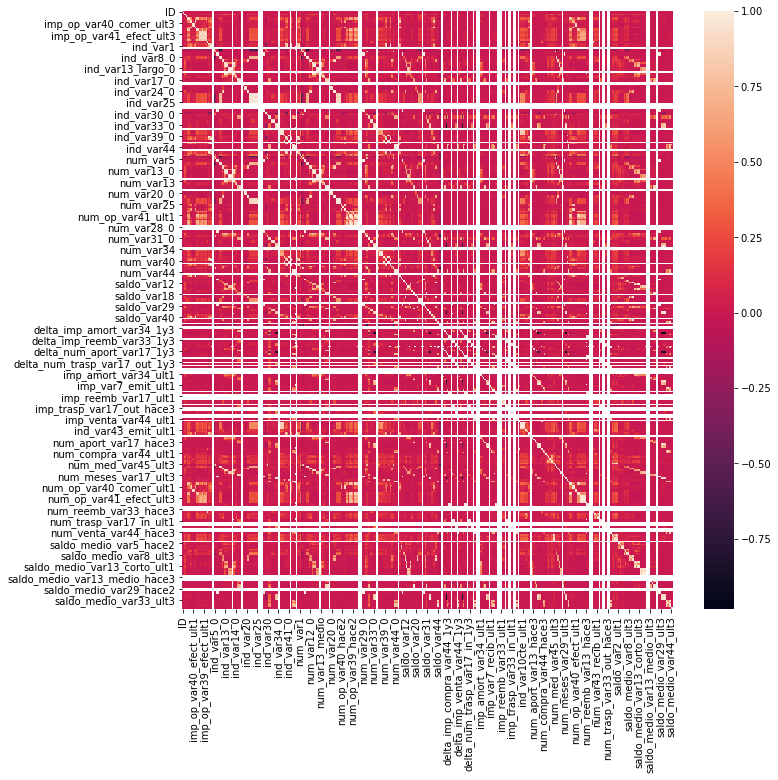

In [96]:
import seaborn as sns
corrmat = X_train.corr()
fig, ax = plt.subplots()
fig.set_size_inches(11,11)
sns.heatmap(corrmat)

In [97]:
correlated_feature = correlation(df,0.8)

In [98]:
correlated_feature

{'delta_imp_aport_var33_1y3',
 'delta_num_aport_var13_1y3',
 'delta_num_aport_var17_1y3',
 'delta_num_aport_var33_1y3',
 'delta_num_compra_var44_1y3',
 'delta_num_reemb_var13_1y3',
 'delta_num_trasp_var17_in_1y3',
 'delta_num_trasp_var33_in_1y3',
 'delta_num_venta_var44_1y3',
 'imp_aport_var17_ult1',
 'imp_aport_var33_hace3',
 'imp_op_var39_comer_ult3',
 'imp_op_var39_efect_ult1',
 'imp_op_var39_efect_ult3',
 'imp_op_var39_ult1',
 'imp_op_var40_comer_ult3',
 'imp_op_var40_efect_ult3',
 'imp_op_var40_ult1',
 'imp_op_var41_comer_ult1',
 'imp_op_var41_comer_ult3',
 'imp_op_var41_efect_ult3',
 'imp_op_var41_ult1',
 'imp_reemb_var13_ult1',
 'imp_trasp_var17_in_ult1',
 'imp_trasp_var33_in_ult1',
 'imp_venta_var44_ult1',
 'ind_var10_ult1',
 'ind_var10cte_ult1',
 'ind_var12',
 'ind_var13',
 'ind_var13_corto',
 'ind_var13_corto_0',
 'ind_var13_largo',
 'ind_var17',
 'ind_var20',
 'ind_var24',
 'ind_var24_0',
 'ind_var25',
 'ind_var25_0',
 'ind_var26',
 'ind_var26_0',
 'ind_var26_cte',
 'ind_var

In [99]:
X_train.drop(correlated_feature,axis=1,inplace=True)

<h4>3.) Information Gain - Classification</h4>

Mutual Information

MI Estimate mutual information for a discrete target variable.

Mutual information (MI) between two random variables is a non-negative value, which measures the dependency between the variables. It is equal to zero if and only if two random variables are independent, and higher values mean higher dependency.

The function relies on nonparametric methods based on entropy estimation from k-nearest neighbors distances.

------

A quantity called mutual information measures the amount of information one can obtain from one random variable given another.

The mutual information between two random variables X and Y can be stated formally as follows:

I(X ; Y) = H(X) – H(X | Y) Where I(X ; Y) is the mutual information for X and Y, H(X) is the entropy for X and H(X | Y) is the conditional entropy for X given Y. The result has the units of bits.


In [101]:
df=pd.read_csv('https://gist.githubusercontent.com/tijptjik/9408623/raw/b237fa5848349a14a14e5d4107dc7897c21951f5/wine.csv')
df.head()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [102]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df.drop(labels=['Wine'], axis=1),
    df['Wine'],
    test_size=0.3,
    random_state=0)

In [103]:
from sklearn.feature_selection import mutual_info_classif
mutual_info = mutual_info_classif(X_train, y_train)
mutual_info

array([0.42707801, 0.30147122, 0.14438255, 0.24598833, 0.17359841,
       0.480931  , 0.72424447, 0.13417938, 0.26938807, 0.61380686,
       0.57640416, 0.54890173, 0.54233631])

In [105]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False) # Highly dependent on target

Flavanoids              0.724244
Color.int               0.613807
Hue                     0.576404
OD                      0.548902
Proline                 0.542336
Phenols                 0.480931
Alcohol                 0.427078
Malic.acid              0.301471
Proanth                 0.269388
Acl                     0.245988
Mg                      0.173598
Ash                     0.144383
Nonflavanoid.phenols    0.134179
dtype: float64

In [106]:
from sklearn.feature_selection import SelectKBest

In [107]:
# Select top 5 important features
sel_five_cols = SelectKBest(mutual_info_classif, k=5)
sel_five_cols.fit(X_train, y_train)
X_train.columns[sel_five_cols.get_support()]

Index(['Flavanoids', 'Color.int', 'Hue', 'OD', 'Proline'], dtype='object')

<h4>4.) Information Gain - Regression</h4>

In [109]:
df = pd.read_csv('housing.csv')

In [110]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [113]:
df = df.select_dtypes(include='number') 

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 37 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   LotFrontage    1201 non-null   float64
 2   LotArea        1460 non-null   int64  
 3   OverallQual    1460 non-null   int64  
 4   OverallCond    1460 non-null   int64  
 5   YearBuilt      1460 non-null   int64  
 6   YearRemodAdd   1460 non-null   int64  
 7   MasVnrArea     1452 non-null   float64
 8   BsmtFinSF1     1460 non-null   int64  
 9   BsmtFinSF2     1460 non-null   int64  
 10  BsmtUnfSF      1460 non-null   int64  
 11  TotalBsmtSF    1460 non-null   int64  
 12  1stFlrSF       1460 non-null   int64  
 13  2ndFlrSF       1460 non-null   int64  
 14  LowQualFinSF   1460 non-null   int64  
 15  GrLivArea      1460 non-null   int64  
 16  BsmtFullBath   1460 non-null   int64  
 17  BsmtHalfBath   1460 non-null   int64  
 18  FullBath

In [116]:
df.drop('Id',axis=1,inplace=True)

In [118]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df.drop(labels=['SalePrice'], axis=1),
    df['SalePrice'],
    test_size=0.3,
    random_state=0)

In [119]:
from sklearn.feature_selection import mutual_info_regression

In [120]:
mutual_info = mutual_info_regression(X_train.fillna(0),y_train) 

In [121]:
mutual_info

array([0.24528138, 0.20805743, 0.16466989, 0.52804878, 0.09736246,
       0.34986687, 0.24038284, 0.09196565, 0.16210245, 0.00891571,
       0.11309918, 0.38575626, 0.31101828, 0.22627107, 0.        ,
       0.48120075, 0.01334681, 0.        , 0.26663054, 0.07471478,
       0.04118913, 0.02334672, 0.20010768, 0.17715254, 0.27155188,
       0.38813908, 0.371843  , 0.06856265, 0.1689722 , 0.00379436,
       0.        , 0.01762609, 0.        , 0.00140238, 0.        ,
       0.0070773 ])

In [123]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

OverallQual      0.528049
GrLivArea        0.481201
GarageCars       0.388139
TotalBsmtSF      0.385756
GarageArea       0.371843
YearBuilt        0.349867
1stFlrSF         0.311018
GarageYrBlt      0.271552
FullBath         0.266631
MSSubClass       0.245281
YearRemodAdd     0.240383
2ndFlrSF         0.226271
LotFrontage      0.208057
TotRmsAbvGrd     0.200108
Fireplaces       0.177153
OpenPorchSF      0.168972
LotArea          0.164670
BsmtFinSF1       0.162102
BsmtUnfSF        0.113099
OverallCond      0.097362
MasVnrArea       0.091966
HalfBath         0.074715
WoodDeckSF       0.068563
BedroomAbvGr     0.041189
KitchenAbvGr     0.023347
ScreenPorch      0.017626
BsmtFullBath     0.013347
BsmtFinSF2       0.008916
YrSold           0.007077
EnclosedPorch    0.003794
MiscVal          0.001402
BsmtHalfBath     0.000000
LowQualFinSF     0.000000
3SsnPorch        0.000000
PoolArea         0.000000
MoSold           0.000000
dtype: float64

<b>SalePrice is 52.8% dependent on OverallQual</b>

In [128]:
from sklearn.feature_selection import SelectPercentile

In [129]:
top_20 = SelectPercentile(mutual_info_regression,percentile=20)
top_20.fit(X_train.fillna(0),y_train) 

SelectPercentile(percentile=20,
                 score_func=<function mutual_info_regression at 0x00000251245E1708>)

In [130]:
top_20.get_support()

array([False, False, False,  True, False,  True, False, False, False,
       False, False,  True,  True, False, False,  True, False, False,
       False, False, False, False, False, False, False,  True,  True,
       False, False, False, False, False, False, False, False, False])

In [135]:
X_train.columns[top_20.get_support()]

Index(['OverallQual', 'YearBuilt', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea',
       'GarageCars', 'GarageArea'],
      dtype='object')

<h4>5.) Chi-Square Test</h4>

Compute chi-squared stats between each non-negative feature and class.

    This score should be used to evaluate categorical variables in a classification task.

This score can be used to select the n_features features with the highest values for the test chi-squared statistic from X, which must contain only non-negative features such as booleans or frequencies (e.g., term counts in document classification), relative to the classes.

Recall that the chi-square test measures dependence between stochastic variables, so using this function “weeds out” the features that are the most likely to be independent of class and therefore irrelevant for classification. The Chi Square statistic is commonly used for testing relationships between categorical variables.

It compares the observed distribution of the different classes of target Y among the different categories of the feature, against the expected distribution of the target classes, regardless of the feature categories.

In [161]:
import seaborn as sns
df=sns.load_dataset('titanic')

In [162]:
df=df[['sex','embarked','alone','pclass','survived']]

<b>Before applying chi-square test, apply label encoding</b>

In [163]:
df['sex'] = np.where(df['sex']=='male',1,0)

In [164]:
embarked_dict = {k:i for i,k in enumerate(df['embarked'].unique(),0)} 
df['embarked'] = df['embarked'].map(embarked_dict) 

In [165]:
df['alone'] = np.where(df['alone']==True,1,0)

In [167]:
df.head()

,sex,embarked,alone,pclass,survived
0,1,0,0,3,0
1,0,1,0,1,1
2,0,0,1,3,1
3,0,0,0,1,1
4,1,0,1,3,0


In [168]:
X_train,X_test,y_train,y_test=train_test_split(df[['sex','embarked','alone','pclass']],
                                              df['survived'],test_size=0.3,random_state=42)

In [169]:
from sklearn.feature_selection import chi2
# Return f-score and p-value 
# The higher the value of the f-score, the more important the feature is
# The lower the p-value, the more important the feature is
f_p_values = chi2(X_train,y_train)  

In [170]:
f_p_values

(array([60.41964418, 11.363384  ,  8.35778435, 17.40807208]),
 array([7.66442567e-15, 7.49062219e-04, 3.84038546e-03, 3.01542662e-05]))

In [174]:
p_values = pd.Series(f_p_values[0])
p_values.index = X_train.columns
p_values.sort_values(ascending=False) 

sex         60.419644
pclass      17.408072
embarked    11.363384
alone        8.357784
dtype: float64

Sex is the most important feature (woman and children were put on lifeboats first)

<h4>6.) Univariate Selection</h4>

In [177]:
df=pd.read_csv('mobile_dataset.csv')
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [179]:
X = df.iloc[:,:-1]
y = df['price_range']

In [180]:
from sklearn.feature_selection import SelectKBest,chi2

In [181]:
k_best = SelectKBest(score_func=chi2,k=20)
features = k_best.fit(X,y) 

In [182]:
features.scores_

array([1.41298666e+04, 7.23232323e-01, 6.48365906e-01, 6.31010795e-01,
       1.01351665e+01, 1.52157239e+00, 8.98391244e+01, 7.45819631e-01,
       9.59728626e+01, 9.09755558e+00, 9.18605355e+00, 1.73635695e+04,
       9.81058675e+03, 9.31267519e+05, 9.61487832e+00, 1.64803191e+01,
       1.32364000e+01, 3.27642810e-01, 1.92842942e+00, 4.22090730e-01])

In [187]:
df_scores = pd.DataFrame(features.scores_)
df_columns = pd.DataFrame(X.columns)

In [188]:
features = pd.concat([df_columns,df_scores],axis=1) 

In [192]:
features.columns = ['feature','score']

In [195]:
features.sort_values('score',ascending=False)

,feature,score
13,ram,931267.519053
11,px_height,17363.569536
0,battery_power,14129.866576
12,px_width,9810.586750
8,mobile_wt,95.972863
6,int_memory,89.839124
15,sc_w,16.480319
16,talk_time,13.236400
4,fc,10.135166
14,sc_h,9.614878


In [196]:
features.nlargest(10,'score')

,feature,score
13,ram,931267.519053
11,px_height,17363.569536
0,battery_power,14129.866576
12,px_width,9810.586750
8,mobile_wt,95.972863
6,int_memory,89.839124
15,sc_w,16.480319
16,talk_time,13.236400
4,fc,10.135166
14,sc_h,9.614878


<h4>7.) Feature Importance</h4>

In [197]:
from sklearn.ensemble import ExtraTreesClassifier
et = ExtraTreesClassifier()
et.fit(X,y) 

ExtraTreesClassifier()

In [198]:
et.feature_importances_

array([0.06060339, 0.019965  , 0.03306465, 0.01996603, 0.03181017,
       0.01691958, 0.03491059, 0.03316339, 0.03623485, 0.03284347,
       0.03368231, 0.04710501, 0.04928163, 0.39555465, 0.03377909,
       0.03458205, 0.03464049, 0.0140855 , 0.01836627, 0.01944187])

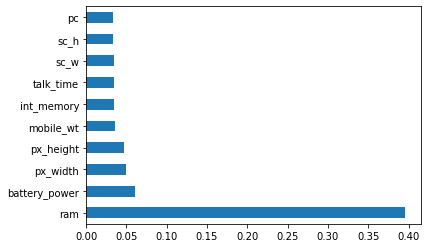

In [202]:
features_importance_list = pd.Series(et.feature_importances_)
features_importance_list.index = X.columns
features_importance_list.nlargest(10).sort_values(ascending=False).plot.barh()